# Plot existing versus expected equivalent pathway mappings from GSEA results

In [1]:
import os
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools as itt

from bio2bel_kegg import Manager as KeggManager
from bio2bel_reactome import Manager as ReactomeManager
from bio2bel_wikipathways import Manager as WikipathwaysManager

from pathway_forte.constants import *
from pathway_forte.pathway_enrichment.functional_class import *

In [2]:
# Initiate Bio2BEL manager to map Pathway identifiers to names
kegg_manager = KeggManager()
reactome_manager = ReactomeManager()
wikipathways_manager = WikipathwaysManager()

In [3]:
brca_dataset = 'brca'
kirc_dataset = 'kirc'
lihc_dataset = 'lihc'
prad_dataset = 'prad'

Load GSEA results

In [4]:
brca_kegg_df, brca_reactome_df, brca_wp_df, brca_merge_df, brca_merge_total_df = gsea_results_to_filtered_df(
    brca_dataset,
    kegg_manager=kegg_manager,
    reactome_manager=reactome_manager,
    wikipathways_manager=wikipathways_manager,
    p_value=0.05,
    absolute_nes_filter=2,
    geneset_set_filter_minimum_size=10,
    geneset_set_filter_maximum_size=None
)

kirc_kegg_df, kirc_reactome_df, kirc_wp_df, kirc_merge_df, kirc_merge_total_df = gsea_results_to_filtered_df(
    kirc_dataset,
    kegg_manager=kegg_manager,
    reactome_manager=reactome_manager,
    wikipathways_manager=wikipathways_manager,
    p_value=0.05,
    absolute_nes_filter=2,
    geneset_set_filter_minimum_size=10,
    geneset_set_filter_maximum_size=None
)

lihc_kegg_df, lihc_reactome_df, lihc_wp_df, lihc_merge_df, lihc_merge_total_df = gsea_results_to_filtered_df(
    lihc_dataset,
    kegg_manager=kegg_manager,
    reactome_manager=reactome_manager,
    wikipathways_manager=wikipathways_manager,
    p_value=0.05,
    absolute_nes_filter=2,
    geneset_set_filter_minimum_size=10,
    geneset_set_filter_maximum_size=None
)

prad_kegg_df, prad_reactome_df, prad_wp_df, prad_merge_df, prad_merge_total_df = gsea_results_to_filtered_df(
    prad_dataset,
    kegg_manager=kegg_manager,
    reactome_manager=reactome_manager,
    wikipathways_manager=wikipathways_manager,
    p_value=0.05,
    absolute_nes_filter=2,
    geneset_set_filter_minimum_size=10,
    geneset_set_filter_maximum_size=None
)

In [5]:
lihc_merge_df

,pathway_name,pathway_id,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
0,Retinol metabolism - Homo sapiens (human),hsa00830,0.675921,2.230719,0.000000,0.007285,67,66,CYP2C8;CYP4A11;LRAT;CYP4A22;ADH4;RDH16;UGT2B7;...,CYP2C8;CYP4A11;LRAT;CYP4A22;ADH4;RDH16;UGT2B7;...
1,Tamoxifen metabolism,WP691,0.808853,2.100633,0.001385,0.026473,21,21,CYP2C8;UGT2B7;CYP2C9;CYP1A2;CYP2C19;CYP2E1;SUL...,CYP2C8;UGT2B7;CYP2C9;CYP1A2;CYP2C19;CYP2E1;SUL...
2,Complement cascade|Complement Activation,R-HSA-166658|WP545,0.677238,2.078727,0.006983,0.022636,121,119,FCN2;COLEC10;CFP;FCN3;C1R;C8A;C6;C9;C8B;MASP1;...,FCN2;COLEC10;CFP;FCN3;C1R;C8A;C6;C9;C8B;MASP1;...
3,Histidine metabolism - Homo sapiens (human),hsa00340,0.725864,2.077178,0.003989,0.017432,23,23,ALDH2;CNDP1;UROC1;ASPA;FTCD;AMDHD1;ALDH1B1;MAO...,ALDH2;CNDP1;UROC1;ASPA;FTCD;AMDHD1;ALDH1B1;MAO...
4,Human Complement System,WP2806,0.567516,2.046771,0.000000,0.020710,99,97,FCN2;CLEC4M;CFP;C1R;C8A;C6;ALB;C9;PLG;MASP1;KL...,FCN2;CLEC4M;CFP;C1R;C8A;C6;ALB;C9;PLG;MASP1;KL...
5,Xenobiotics,R-HSA-211981,0.712671,2.040787,0.004178,0.018755,24,24,CYP2C8;CYP2C9;CYP1A2;CYP2B6;CYP2J2;CYP2C19;CYP...,CYP2C8;CYP2C9;CYP1A2;CYP2B6;CYP2J2;CYP2C19;CYP...
6,Complement and coagulation cascades - Homo sap...,hsa04610|WP558,0.658520,2.028936,0.001244,0.019030,82,81,C1R;C8A;C6;C9;PLG;C8B;MASP1;F9;KLKB1;C1S;FGB;S...,C1R;C8A;C6;C9;PLG;C8B;MASP1;F9;KLKB1;C1S;FGB;S...
7,Parkin-Ubiquitin Proteasomal System pathway,WP2359,-0.608084,-2.001458,0.000000,0.002027,70,70,TUBB1;UBE2L6;SNCA;CASP1;HSPA6;UBE2G1;TUBB6;GPR...,TUBA8;UBE2J1;HSPA1A;HSPA8;PSMD12;TUBB2A;TUBA1C...
8,G1 to S cell cycle control,WP45,-0.665122,-2.001925,0.002378,0.002021,64,64,WEE1;MYC;GADD45A;CREB3L3;CDKN1A;CCND1;CCNA1;CC...,CDKN2D;ORC4;POLE;CREB1;CCNE2;CDKN2B;TFDP2;ORC2...
9,Transport of Mature mRNA derived from an Intro...,R-HSA-159236,-0.718337,-2.002650,0.000000,0.001990,74,72,CDC40;SRSF5;NUP88;FYTTD1;RANBP2;NUP98;U2AF1;NU...,NXT1;SRSF4;SRSF7;NUP35;SRSF3;NUP160;SARNP;U2AF...


Load mappings and create mapping dictionary 

In [6]:
brca_actual_dict, brca_expected_dict = get_pairwise_mapping_numbers(
    brca_kegg_df, 
    brca_reactome_df, 
    brca_wp_df, 
    brca_merge_df, 
    brca_merge_total_df
)
kirc_actual_dict, kirc_expected_dict = get_pairwise_mapping_numbers(
    kirc_kegg_df, 
    kirc_reactome_df, 
    kirc_wp_df, 
    kirc_merge_df, 
    kirc_merge_total_df
)
lihc_actual_dict, lihc_expected_dict = get_pairwise_mapping_numbers(
    lihc_kegg_df, 
    lihc_reactome_df, 
    lihc_wp_df, 
    lihc_merge_df, 
    lihc_merge_total_df
)
prad_actual_dict, prad_expected_dict = get_pairwise_mapping_numbers(
    prad_kegg_df, 
    prad_reactome_df, 
    prad_wp_df, 
    prad_merge_df, 
    prad_merge_total_df
)

In [7]:
brca_kegg_df.head()

,pathway_name,pathway_id,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
0,Drug metabolism - cytochrome P450 - Homo sapie...,hsa00982,0.606361,2.392575,0.0,0.007270,70,67,FMO2;ADH5;ADH1C;MAOA;ADH1B;GSTM2;ADH4;ADH1A;AL...,FMO2;ADH5;ADH1C;MAOA;ADH1B;GSTM2;ADH4;ADH1A;AL...
1,Retinol metabolism - Homo sapiens (human),hsa00830,0.542550,2.181489,0.0,0.023627,67,64,ALDH1A2;ADH5;ADH1C;ALDH1A1;RDH5;ADH1B;RETSAT;A...,ALDH1A2;ADH5;ADH1C;ALDH1A1;RDH5;ADH1B;RETSAT;A...
2,Chemical carcinogenesis - Homo sapiens (human),hsa05204,0.525088,2.178827,0.0,0.015751,82,78,ADH5;ADH1C;ADH1B;GSTM2;ADH4;ADH1A;ALDH1A3;HSD1...,ADH5;ADH1C;ADH1B;GSTM2;ADH4;ADH1A;ALDH1A3;HSD1...
3,Regulation of lipolysis in adipocytes - Homo s...,hsa04923,0.661784,2.165316,0.0,0.011813,54,54,ADRB2;ADCY4;PIK3R1;NPR1;GNAI1;PLIN1;FABP4;LIPE...,ADRB2;ADCY4;PIK3R1;NPR1;GNAI1;PLIN1;FABP4;LIPE...
4,Renin secretion - Homo sapiens (human),hsa04924,0.570864,2.091903,0.0,0.028352,65,65,ADRB2;AQP1;PDE1C;PTGER4;NPR1;GNAI1;ADCYAP1R1;C...,ADRB2;AQP1;PDE1C;PTGER4;NPR1;GNAI1;ADCYAP1R1;C...


In [8]:
brca_reactome_df.head()

,pathway_name,pathway_id,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
0,Phase I - Functionalization of compounds,R-HSA-211945,0.581830,2.352063,0.000000,0.007433,105,105,CYP2U1;FMO2;ADH5;ADH1C;ALDH1A1;CES2;AOC3;CYP11...,CYP2U1;FMO2;ADH5;ADH1C;ALDH1A1;CES2;AOC3;CYP11...
1,FGFR2 ligand binding and activation,R-HSA-190241,0.698974,2.338042,0.000000,0.004392,20,20,FGF1;FGF2;FGF7;FGF17;FGFBP2;FGF16;FGF8;FGF20;F...,FGF1;FGF2;FGF7;FGF17;FGFBP2;FGF16;FGF8;FGF20;FGF9
2,FGFR1 ligand binding and activation,R-HSA-190242,0.717446,2.335312,0.000000,0.003153,16,16,FGF1;KL;FGF2;FGF17;FGFR1;FGF8;FGF20;FGF9;FGF6;...,FGF1;KL;FGF2;FGF17;FGFR1;FGF8;FGF20;FGF9
3,Phospholipase C-mediated cascade: FGFR1,R-HSA-5654219,0.718803,2.329780,0.000000,0.002365,16,16,FGF1;KL;FGF2;FGF17;FGFR1;FGF8;FGF20;FGF9;FGF6;...,FGF1;KL;FGF2;FGF17;FGFR1;FGF8;FGF20;FGF9
4,PI-3K cascade:FGFR1,R-HSA-5654689,0.686072,2.324603,0.002092,0.002027,21,21,FGF1;KL;PIK3R1;FGF2;PTPN11;FGF17;GAB1;FGFR1;PI...,FGF1;KL;PIK3R1;FGF2;PTPN11;FGF17;GAB1;FGFR1;PI...


In [9]:
brca_wp_df.head()


,pathway_name,pathway_id,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
0,Phosphodiesterases in neuronal function,WP4222,0.617845,2.200640,0.000000,0.021374,53,53,PDE2A;ADCY4;PDE1C;PDE7B;GRIN2B;PDE1A;PDE3B;PDE...,PDE2A;ADCY4;PDE1C;PDE7B;GRIN2B;PDE1A;PDE3B;PDE...
1,"GPCRs, Class B Secretin-like",WP334,0.684921,2.192811,0.000000,0.014249,24,24,ADGRL4;ADCYAP1R1;SCTR;VIPR1;CRHR2;ADGRL2;ADGRL...,ADGRL4;ADCYAP1R1;SCTR;VIPR1;CRHR2;ADGRL2;ADGRL...
2,Fatty Acid Omega Oxidation,WP206,0.832027,2.125292,0.000000,0.023749,15,15,ADH1C;ALDH1A1;ADH1B;ALDH2;ADH4;ADH1A;ADH6;CYP3...,ADH1C;ALDH1A1;ADH1B;ALDH2;ADH4;ADH1A;ADH6;CYP3...
3,Melatonin metabolism and effects,WP3298,0.594248,2.100261,0.005882,0.024936,42,38,FOXO1;CRY2;PER1;PER2;MAOA;PER3;TRAF6;EDN1;SIRT...,FOXO1;CRY2;PER1;PER2;MAOA;PER3;TRAF6;EDN1;SIRT...
4,ESC Pluripotency Pathways,WP3931,0.504015,2.086433,0.000000,0.027073,118,116,LIFR;FGF1;SELENOP;FGF2;SMAD9;FGF7;FZD4;PDGFRA;...,LIFR;FGF1;SELENOP;FGF2;SMAD9;FGF7;FZD4;PDGFRA;...


In [10]:
brca_merge_df

,pathway_name,pathway_id,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
0,Drug metabolism - cytochrome P450 - Homo sapie...,hsa00982,0.606361,2.386178,0.000000,0.007034,70,67,FMO2;ADH5;ADH1C;MAOA;ADH1B;GSTM2;ADH4;ADH1A;AL...,FMO2;ADH5;ADH1C;MAOA;ADH1B;GSTM2;ADH4;ADH1A;AL...
1,Phase I - Functionalization of compounds,R-HSA-211945,0.581830,2.362068,0.000000,0.005140,105,105,CYP2U1;FMO2;ADH5;ADH1C;ALDH1A1;CES2;AOC3;CYP11...,CYP2U1;FMO2;ADH5;ADH1C;ALDH1A1;CES2;AOC3;CYP11...
2,FGFR2 ligand binding and activation,R-HSA-190241,0.698974,2.333409,0.000000,0.006132,20,20,FGF1;FGF2;FGF7;FGF17;FGFBP2;FGF16;FGF8;FGF20;F...,FGF1;FGF2;FGF7;FGF17;FGFBP2;FGF16;FGF8;FGF20;FGF9
3,PI-3K cascade:FGFR2,R-HSA-5654695,0.676320,2.321635,0.000000,0.005681,23,23,FGF1;PIK3R1;FGF2;FGF7;PTPN11;FGF17;GAB1;FGF16;...,FGF1;PIK3R1;FGF2;FGF7;PTPN11;FGF17;GAB1;FGF16;...
4,Phospholipase C-mediated cascade; FGFR2,R-HSA-5654221,0.705582,2.307058,0.000000,0.005951,18,18,FGF1;FGF2;FGF7;FGF17;FGF16;FGF8;FGF20;FGF9;FGF...,FGF1;FGF2;FGF7;FGF17;FGF16;FGF8;FGF20;FGF9
5,Activated point mutants of FGFR2,R-HSA-2033519,0.713356,2.288591,0.000000,0.006763,17,17,FGF1;FGF2;FGF7;FGF17;FGF16;FGF8;FGF20;FGF9;FGF...,FGF1;FGF2;FGF7;FGF17;FGF16;FGF8;FGF20;FGF9
6,Phospholipase C-mediated cascade: FGFR1,R-HSA-5654219,0.718803,2.265341,0.000000,0.008889,16,16,FGF1;KL;FGF2;FGF17;FGFR1;FGF8;FGF20;FGF9;FGF6;...,FGF1;KL;FGF2;FGF17;FGFR1;FGF8;FGF20;FGF9
7,FGFR1 ligand binding and activation,R-HSA-190242,0.717446,2.260176,0.000000,0.008319,16,16,FGF1;KL;FGF2;FGF17;FGFR1;FGF8;FGF20;FGF9;FGF6;...,FGF1;KL;FGF2;FGF17;FGFR1;FGF8;FGF20;FGF9
8,Phosphodiesterases in neuronal function,WP4222,0.617845,2.252427,0.000000,0.008536,53,53,PDE2A;ADCY4;PDE1C;PDE7B;GRIN2B;PDE1A;PDE3B;PDE...,PDE2A;ADCY4;PDE1C;PDE7B;GRIN2B;PDE1A;PDE3B;PDE...
9,PI-3K cascade:FGFR1,R-HSA-5654689,0.686072,2.251998,0.000000,0.007791,21,21,FGF1;KL;PIK3R1;FGF2;PTPN11;FGF17;GAB1;FGFR1;PI...,FGF1;KL;PIK3R1;FGF2;PTPN11;FGF17;GAB1;FGFR1;PI...


In [11]:
b_kegg_df, b_reactome_df, b_wp_df, b_merge_df, b_merge_total_df = gsea_results_to_filtered_df(
    brca_dataset,
    kegg_manager=kegg_manager,
    reactome_manager=reactome_manager,
    wikipathways_manager=wikipathways_manager,
    p_value=0.05,
    absolute_nes_filter=2,
    geneset_set_filter_minimum_size=20,
    geneset_set_filter_maximum_size=None
)

In [12]:
type(b_merge_df)

pandas.core.frame.DataFrame

In [13]:
for elem in brca_merge_df.iloc[0]:
    print(elem)
    

Drug metabolism - cytochrome P450 - Homo sapiens (human)
hsa00982
0.6063606475747181
2.3861782967785743
0.0
0.007033543887604562
70
67
FMO2;ADH5;ADH1C;MAOA;ADH1B;GSTM2;ADH4;ADH1A;ALDH1A3;AOX1;ADH6;MGST1;HPGDS;CYP3A4;FMO4;FMO1;CYP1A2;MAOB;GSTM5;CYP3A5;GSTK1;GSTT2;GSTA4;UGT2B28;GSTP1;GSTM4;GSTT2B;MGST3;UGT2B15;FMO5;MGST2;GSTA1;CYP2C9;ADH7;CYP2D7;ALDH3A1;GSTM1;UGT2B7;CYP2C19;UGT2B11;UGT1A9;UGT1A8;UGT1A7;FMO3;UGT2A1;CYP2E1;UGT1A4;UGT1A10;UGT1A3;GSTO2;UGT1A1;CYP2D6;UGT1A6;CYP2B6;GSTA2;UGT2B10;GSTA5;UGT2B4;UGT2A3;CYP2C8;ALDH3B2;CYP2A6;UGT2B17;GSTA3;GSTM3;ALDH3B1;GSTO1
FMO2;ADH5;ADH1C;MAOA;ADH1B;GSTM2;ADH4;ADH1A;ALDH1A3;AOX1;ADH6;MGST1;HPGDS;CYP3A4;FMO4;FMO1;CYP1A2;MAOB;GSTM5;CYP3A5;GSTK1;GSTT2


### BRCA Dataset comparison 

*Custom filter to return only pathways with over 20 genes 

|Pathway|KEGG NES (match size)|Reactome NES (match size)|WikiPathways NES (match size)|Merged NES (match size)|Molecular entities|Pathway Description
|------|------|------|------|------|------|------|
|Drug metabolism - cytochrome P450 - Homo sapiens (human)|2.392575 (67)|-|-|2.386178 (67)|ALDH1A3: Association with cancer development, progression and prognosis|loss of retinoid activity present in HCC cell lines, decreased storage of hepatic retinoid, aberrant retinoid signaling in patients with cirrhosis and HCC (PMID:26311412)


### LIHC Dataset comparison

In [14]:
lihc_merge_df

,pathway_name,pathway_id,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
0,Retinol metabolism - Homo sapiens (human),hsa00830,0.675921,2.230719,0.000000,0.007285,67,66,CYP2C8;CYP4A11;LRAT;CYP4A22;ADH4;RDH16;UGT2B7;...,CYP2C8;CYP4A11;LRAT;CYP4A22;ADH4;RDH16;UGT2B7;...
1,Tamoxifen metabolism,WP691,0.808853,2.100633,0.001385,0.026473,21,21,CYP2C8;UGT2B7;CYP2C9;CYP1A2;CYP2C19;CYP2E1;SUL...,CYP2C8;UGT2B7;CYP2C9;CYP1A2;CYP2C19;CYP2E1;SUL...
2,Complement cascade|Complement Activation,R-HSA-166658|WP545,0.677238,2.078727,0.006983,0.022636,121,119,FCN2;COLEC10;CFP;FCN3;C1R;C8A;C6;C9;C8B;MASP1;...,FCN2;COLEC10;CFP;FCN3;C1R;C8A;C6;C9;C8B;MASP1;...
3,Histidine metabolism - Homo sapiens (human),hsa00340,0.725864,2.077178,0.003989,0.017432,23,23,ALDH2;CNDP1;UROC1;ASPA;FTCD;AMDHD1;ALDH1B1;MAO...,ALDH2;CNDP1;UROC1;ASPA;FTCD;AMDHD1;ALDH1B1;MAO...
4,Human Complement System,WP2806,0.567516,2.046771,0.000000,0.020710,99,97,FCN2;CLEC4M;CFP;C1R;C8A;C6;ALB;C9;PLG;MASP1;KL...,FCN2;CLEC4M;CFP;C1R;C8A;C6;ALB;C9;PLG;MASP1;KL...
5,Xenobiotics,R-HSA-211981,0.712671,2.040787,0.004178,0.018755,24,24,CYP2C8;CYP2C9;CYP1A2;CYP2B6;CYP2J2;CYP2C19;CYP...,CYP2C8;CYP2C9;CYP1A2;CYP2B6;CYP2J2;CYP2C19;CYP...
6,Complement and coagulation cascades - Homo sap...,hsa04610|WP558,0.658520,2.028936,0.001244,0.019030,82,81,C1R;C8A;C6;C9;PLG;C8B;MASP1;F9;KLKB1;C1S;FGB;S...,C1R;C8A;C6;C9;PLG;C8B;MASP1;F9;KLKB1;C1S;FGB;S...
7,Parkin-Ubiquitin Proteasomal System pathway,WP2359,-0.608084,-2.001458,0.000000,0.002027,70,70,TUBB1;UBE2L6;SNCA;CASP1;HSPA6;UBE2G1;TUBB6;GPR...,TUBA8;UBE2J1;HSPA1A;HSPA8;PSMD12;TUBB2A;TUBA1C...
8,G1 to S cell cycle control,WP45,-0.665122,-2.001925,0.002378,0.002021,64,64,WEE1;MYC;GADD45A;CREB3L3;CDKN1A;CCND1;CCNA1;CC...,CDKN2D;ORC4;POLE;CREB1;CCNE2;CDKN2B;TFDP2;ORC2...
9,Transport of Mature mRNA derived from an Intro...,R-HSA-159236,-0.718337,-2.002650,0.000000,0.001990,74,72,CDC40;SRSF5;NUP88;FYTTD1;RANBP2;NUP98;U2AF1;NU...,NXT1;SRSF4;SRSF7;NUP35;SRSF3;NUP160;SARNP;U2AF...


|Pathway Name|KEGG NES (match size)|Reactome NES (match size)|WikiPathways NES (match size)|Merged NES (match size)|Molecular entities|Pathway Description
|------|------|------|------|------|------|------|
|Retinol metabolism - Homo sapiens (human)|2.133740 (66)|-|-|2.230719 (66)|CYP2A6/CYP2C8: Down-regulation of gene leads to worse overall survival from hepatocellular carcinoma (HCC) (PMID:30148168); ADH4: Prognostic marker of liver cancer (PMID:22147505); UGT2B7: regulated by specific miRNA which control its expression in cancer and/or normal liver cells (PMID:28389526)|loss of retinoid activity present in HCC cell lines, decreased storage of hepatic retinoid, aberrant retinoid signaling in patients with cirrhosis and HCC (PMID:26311412)
|Tamoxifen metabolism|-|-|2.058462 (21)|2.100633 (21)|CYP2A6/CYP2C8: Down-regulation of gene leads to worse overall survival from hepatocellular carcinoma (HCC) (PMID:30148168); UGT2B7: regulated my specific miRNA which control its expression in cancer and/or normal liver cells (PMID:28389526); SULT1A1: potentially altered in HCC development (PMID:16517757)|Tamoxifen metabolism in the liver; Tamoxifen treatment (commonly for breast cancer) associated with a side effect of an increased risk of the development of nonalcoholic fatty liver (steatosis) 
|Complement cascade/Complement Activation|-|2.083848 (119)|2.066553 (22)|2.078727 (119)|FCN2: Potential prognostic marker of HCC (PMID:27177473); COLEC10: decreased expression may predict poor overall survival in HCC patients| Complement activation can increase tumor growth and metastasis

Liver Hepatocellular Carcinoma (LIHC) GSEA results for pathways from three major databases (KEGG, Reactome and WikiPathways) and one merged resource (PathwayForte) were filtered by a p-value of 0.05%, a minimum gene set size of 10 and normalized enrichment scores greater than 2 or less than -2. For the PathwayForte resource, the filtering revealed 486 pathways, of which the majority derived from Reactome (~76%), ~13% derived from KEGG, ~5% from WikiPathways and the remaining ~7% from two or more databases.

The top ranking pathway returned for the merged resource was 'Retinol metabolism - Homo Sapiens (human)'. An in-depth analysis of genes involved in this pathway revealed genes which have been previously studied for their role in the development of hepatocellular carcinoma (HCC). These include CYP2A6/CYP2C8 (down-regulation of this gene leads to worse overall survival from hepatocellular carcinoma (HCC)), ADH4 (a prognostic marker of liver cancer) and UGT2B7  (regulated by a specific miRNA which control its expression in cancer and/or normal liver cells). Among the top 3 ranked pathways, we find an equivalent pathway (i.e., the combination of complement cascade and complement activation from Reactome and WikiPathways, respectively) which is evidenced to increase tumor growth and metastasis. FCN2 (a potential prognostic marker of HCC) and  COLEC10 (decreased expression of which may predict poor overall survival in HCC patients). 


For the top 486 ranked pathways in the merged LIHC dataset:
12.55% are from KEGG
76.13% are from Reactome
4.73% are from WikiPathways
6.58% are a combination of 2 or more databases

Plot how many pairwise pathways with mappings exist versus how many are expected

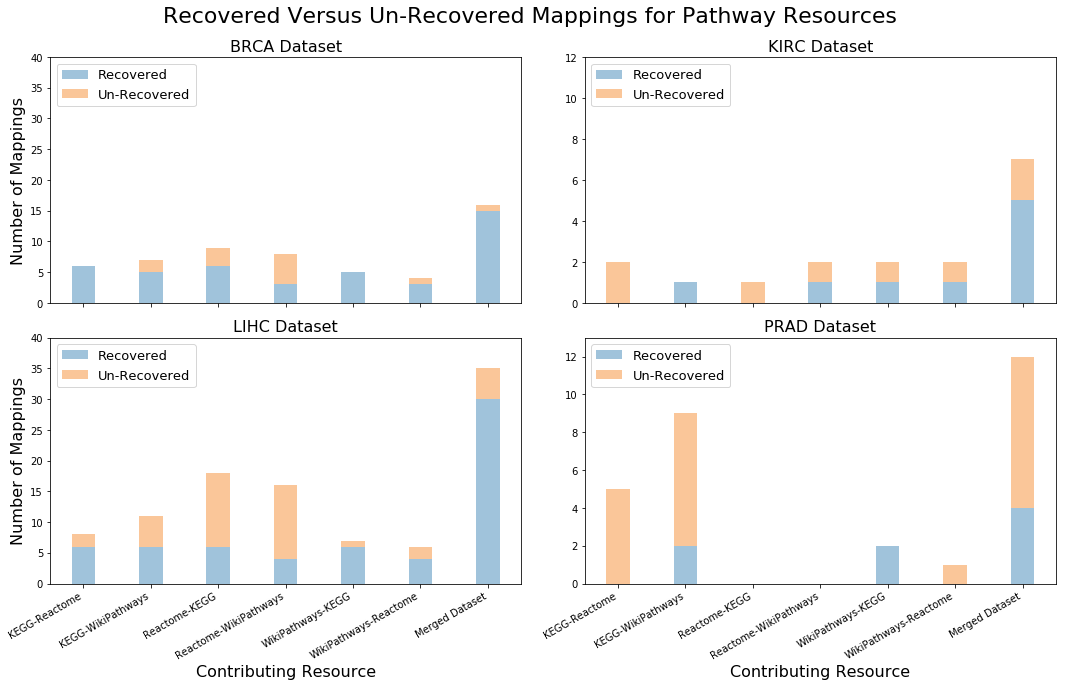

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.suptitle('Recovered Versus Un-Recovered Mappings for Pathway Resources', fontsize=22)

N = 7
index = np.arange(N)
bar_width = 0.35
opacity = 0.8

pairings = ('KEGG-Reactome', 
 'KEGG-WikiPathways', 
 'Reactome-KEGG', 
 'Reactome-WikiPathways',
 'WikiPathways-KEGG', 
 'WikiPathways-Reactome',
 'Merged Dataset'
)
label_font = {'size': 16}


plt.subplot(2, 2, 1)
actual_vals = list(brca_actual_dict.values())
expected_vals = list(brca_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(ind, actual_vals, width,alpha=opacity, color='#88b4d3',label='Recovered')
p2 = plt.bar(ind, difference, width, bottom=actual_vals, alpha=opacity, color='#f9b880',label='Un-Recovered')

plt.title('BRCA Dataset', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xticks(index, pairings)
plt.ylim(0,40)
plt.legend(prop={'size':13},loc=2)


plt.subplot(2, 2, 2)
actual_vals = list(kirc_actual_dict.values())
expected_vals = list(kirc_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(ind, actual_vals, width,alpha=opacity, color='#88b4d3',label='Recovered')
p2 = plt.bar(ind, difference, width, bottom=actual_vals, alpha=opacity, color='#f9b880',label='Un-Recovered')

plt.title('KIRC Dataset', fontsize=16)
plt.xticks(index, pairings)
plt.ylim(0,12)
plt.legend(prop={'size':13},loc=2)

plt.subplot(2, 2, 3)
actual_vals = list(lihc_actual_dict.values())
expected_vals = list(lihc_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(ind, actual_vals, width,alpha=opacity, color='#88b4d3',label='Recovered')
p2 = plt.bar(ind, difference, width, bottom=actual_vals, alpha=opacity, color='#f9b880',label='Un-Recovered')

plt.title('LIHC Dataset', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xlabel('Contributing Resource', fontdict=label_font)
plt.xticks(index, pairings)
plt.ylim(0,40)
plt.legend(prop={'size':13},loc=2)

plt.subplot(2, 2, 4)
actual_vals = list(prad_actual_dict.values())
expected_vals = list(prad_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(ind, actual_vals, width,alpha=opacity, color='#88b4d3',label='Recovered')
p2 = plt.bar(ind, difference, width, bottom=actual_vals, alpha=opacity, color='#f9b880',label='Un-Recovered')

plt.title('PRAD Dataset', fontsize=16)
plt.xlabel('Contributing Resource', fontdict=label_font)
plt.ylim(0,13)
plt.xticks(index, pairings)
plt.legend(prop={'size':13},loc=2)

fig.autofmt_xdate()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('pairwise_mappings.png',dpi=250)
plt.show()

This figure depicts the number of pathways which are anticipated to be seen in one database contingent on their being present in a second database as these sets of pathways are defined as equivalent across databases. These expected pathways between pairwise sets of databases (blue) and the number of pairwise mappings which actually exist (orange) are plotted for four TCGA datasets (i.e., BRCA, LIHC, KIRC and PRAD). The upper two subplots in the figure (i.e., BRCA and LIHC) are larger pathways and correspondingly contain a much greater proportion of genes while the lower two (i.e., KIRC and PRAD) contain a fewer number. As such, the number of equivalent pathway mappings in the lower datasets is lower than the former. 

In the figure attached, you can see the number of pathways which are expected to be enriched in one database because they are present in a second database as these pairs of pathways are defined as equivalent across databases (e.g., if we see apoptosis is significant in gsea results for KEGG for breast cancer and we know apoptosis is also a pathway in Reactome, we should also see it in gsea results for Reactome). As can be seen in the figure,  while a single database captures some but a limited number of equivalent pathways, the merged dataset includes most of the pathways which are expected

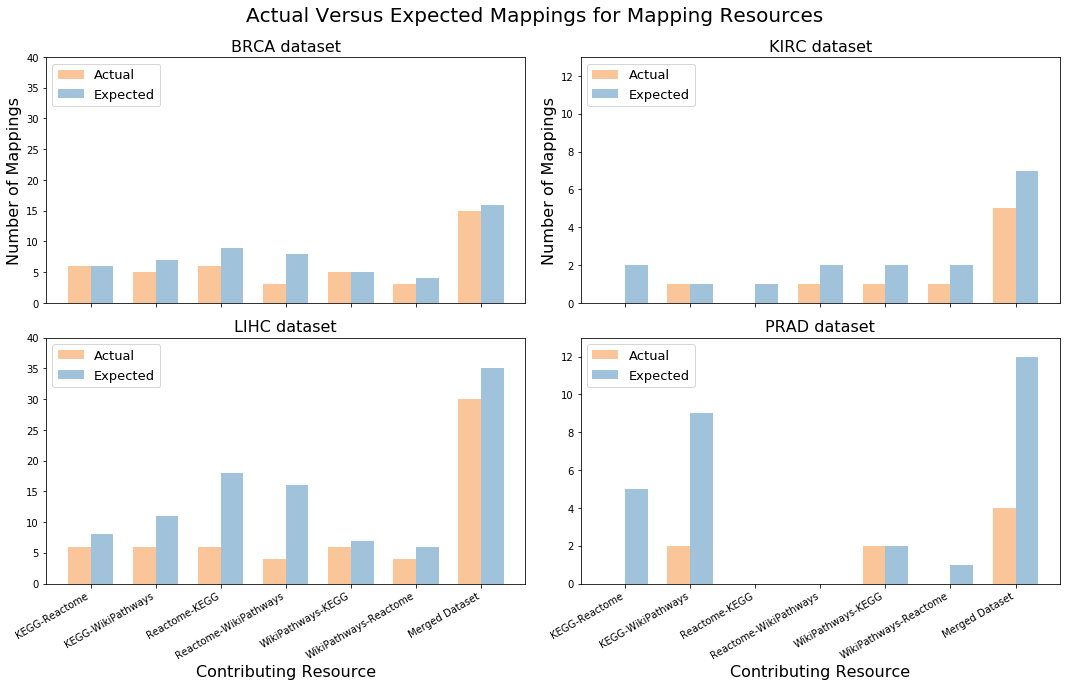

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.suptitle('Actual Versus Expected Mappings for Mapping Resources', fontsize=20)

index = np.arange(7)
bar_width = 0.35
opacity = 0.8

pairings = ('KEGG-Reactome', 
 'KEGG-WikiPathways', 
 'Reactome-KEGG', 
 'Reactome-WikiPathways',
 'WikiPathways-KEGG', 
 'WikiPathways-Reactome',
 'Merged Dataset'
)
label_font = {'size': 16}

plt.subplot(2, 2, 1)
plt.bar(
    index, 
    list(brca_actual_dict.values()), 
    bar_width,
    alpha=opacity,
    color='#f9b880',
    label='Actual'
)
plt.bar(
    index + bar_width, 
    list(brca_expected_dict.values()), 
    bar_width,
    alpha=opacity,
    color='#88b4d3',
    label='Expected'
)
plt.title('BRCA dataset', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xlabel('Contributing Resource', fontdict=label_font)
plt.xticks(index + bar_width/2, pairings)
plt.ylim(0,40)
plt.legend(prop={'size':13},loc=2)

plt.subplot(2, 2, 2)
plt.bar(
    index, 
    list(kirc_actual_dict.values()), 
    bar_width,
    alpha=opacity,
    color='#f9b880',
    label='Actual'
)
plt.bar(
    index + bar_width, 
    list(kirc_expected_dict.values()), 
    bar_width,
    alpha=opacity,
    color='#88b4d3',
    label='Expected'
)
plt.title('KIRC dataset', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xlabel('Contributing Resource', fontdict=label_font)
plt.xticks(index + bar_width/2, pairings)
plt.ylim(0,13)
plt.legend(prop={'size':13},loc=2)

plt.subplot(2, 2, 3)
plt.bar(
    index, 
    list(lihc_actual_dict.values()), 
    bar_width,
    alpha=opacity,
    color='#f9b880',
    label='Actual'
)
plt.bar(
    index + bar_width, 
    list(lihc_expected_dict.values()), 
    bar_width,
    alpha=opacity,
    color='#88b4d3',
    label='Expected'
)
plt.title('LIHC dataset', fontsize=16)
plt.xlabel('Contributing Resource', fontdict=label_font)
plt.xticks(index + bar_width/2, pairings)
plt.ylim(0,40)
plt.legend(prop={'size':13},loc=2)

plt.subplot(2, 2, 4)
plt.bar(
    index, 
    list(prad_actual_dict.values()), 
    bar_width,
    alpha=opacity,
    color='#f9b880',
    label='Actual'
)
plt.bar(
    index + bar_width, 
    list(prad_expected_dict.values()), 
    bar_width,
    alpha=opacity,
    color='#88b4d3',
    label='Expected'
)
plt.title('PRAD dataset', fontsize=16)
plt.xlabel('Contributing Resource', fontdict=label_font)
plt.xticks(index + bar_width/2, pairings)
plt.ylim(0,13)
plt.legend(prop={'size':13},loc=2)

fig.autofmt_xdate()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('pairwise_mappings.png',dpi=500)
plt.show()

In [16]:
gsea_merge_statistics(brca_merge_df, 'BRCA')

For the top 384 ranked pathways in the merged BRCA dataset:
9.38% are from KEGG
78.39% are from Reactome
8.33% are from WikiPathways
3.91% are a combination of 2 or more databases


In [17]:
gsea_merge_statistics(lihc_merge_df, 'LIHC')

For the top 486 ranked pathways in the merged LIHC dataset:
12.55% are from KEGG
76.13% are from Reactome
4.73% are from WikiPathways
6.58% are a combination of 2 or more databases


In [18]:
gsea_merge_statistics(kirc_merge_df, 'KIRC')

For the top 68 ranked pathways in the merged KIRC dataset:
48.53% are from KEGG
30.88% are from Reactome
11.76% are from WikiPathways
8.82% are a combination of 2 or more databases


In [19]:
gsea_merge_statistics(prad_merge_df, 'PRAD')

For the top 74 ranked pathways in the merged PRAD dataset:
31.08% are from KEGG
37.84% are from Reactome
24.32% are from WikiPathways
6.76% are a combination of 2 or more databases


In [20]:
#TODO count for num sig pathways and how many of those are equivalent